> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VII: Neural Networks

<div style="text-align: right"> **Due date: Dec. 7, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8 PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">2019843554 Kai Jun Neo</span> </h2>

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-12-03 02:12:53.345860


## Problem description

We will implement a simple neural network for binary classification. Let me first see a behavior of a simple logistic regression method on a $\text{moon}$ dataset. This dataset has been widely used to test nonlinear classifier and clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
# dataset
np.random.seed(0)
X, y = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

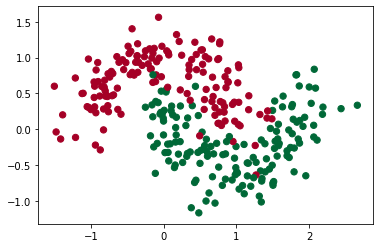

In [4]:
plt.scatter(X[:,0], X[:,1], s = 40, c=y, cmap=plt.cm.RdYlGn)

It seems hard to to classify this dataset with linear classifiers such as a logistic regression method. That is, it is hard to draw a straight line (i.e., decision boundaries) to divide training sets into two different regions pefectly. The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [5]:
import sklearn.linear_model
from P07 import plot_decision_boundary

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use a help function ($\texttt{plot_decision_boundary}$) provided that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers. In logistic regression, it is the output value of sigmoid functions. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are training datasets and color for each label in the dataset, respectively. See the example below.

In [6]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

C:\Users\kaiju\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Logistic Regression')

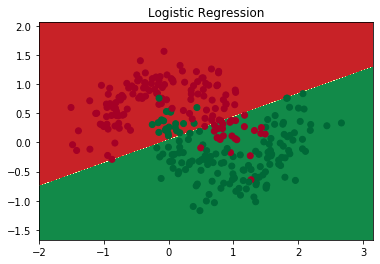

In [7]:
# plot boundary
plot_decision_boundary(pred_func=clf.predict, train_data = X, color = y)
plt.title("Logistic Regression")

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a simple neural network and check that it gives a nonlinear classifier. The network we will implement consists series of fully connected layers followed by nonlinear activation functions. 

### I. Neural networks using gradiend descent.
(*70 points*) P1.1 Implement a multilayer perceptron method using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset.

 > $H_1 = X \cdot W_1 + b_1$   
 > $z_1 = ReLU(H_1)$ where $ReLU$ is a rectified linear unit and $z_1$ is an output of the first hidden layer. 
 
 > $H_2 = z_1 \cdot W_2 + b_2$   
 > $z_2 = \sigma(H_2)$ where $\sigma$ is a sigmoid function and $z_2$ is an output of the second hidden layer.    
 
 > $H_3 = z_2 \cdot W_3 + b_3$   
 > $\hat y = softmax(H_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(h)_j= \frac{\exp^{h_j}}{\sum_{k=1}^{K} \exp^{h_k}}$ for $j=1,\dots,K$,
 >
 > where $h_j$ is the $j$th element of the input vector $h\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > $W$ and $b$ are weights and bias, respectively.   
 
 > Initialization for weight: Standard normal (use $\texttt{np.random.randn}$.)
 
 > Initialization for bias: 0   
 
 > Input size: 2
 
 > The first hidden layer size: 10
 
 > The second hidden layer size: 10
 
 > Output size: 2
 
 > Loss function: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(H_3)_k)$
 >
 > where $I_k$ is an indicator function that has the value of 1 iff the training sample belongs to the class $k$ and 0 otherwise.   
 > Total loss : summation of above for all training samples.   
 >
 > $L_{total} = -\sum_{i=1}^N{\sum_{k=1}^K I^{(i)}_k \log(softmax(H_3^{(i)})_k)}$   
 >
 > where $I^{(i)}$ and $H_3^{(i)}$ are the indicator and the output of the last hidden layer of i-th sample respectively.
 
 > Optimization: Gradient descent
 
 > Learning rate = 0.001
 
 > Number of epochs = 50000

In [8]:
from P07 import build_model, predict

In [9]:
y_onehot = np.eye(X.shape[1])[y]

In [10]:
# input layer dimensionality
nn_input_dim = 2
# output layer dimensionality
nn_output_dim = 2
# first hidden layer dimensionality
nn_hdim1 = 10
# second hidden layer dimensionality
nn_hdim2 = 10
# learning rate 
lr = 0.001 
# epoch number
epoch = 50000

Loss (iteration 1000): 32.035125
Loss (iteration 2000): 28.308372
Loss (iteration 3000): 25.893237
Loss (iteration 4000): 23.770380
Loss (iteration 5000): 22.142126
Loss (iteration 6000): 20.959754
Loss (iteration 7000): 20.007165
Loss (iteration 8000): 19.172789
Loss (iteration 9000): 18.430829
Loss (iteration 10000): 17.780176
Loss (iteration 11000): 17.191476
Loss (iteration 12000): 16.663122
Loss (iteration 13000): 16.155466
Loss (iteration 14000): 15.621571
Loss (iteration 15000): 15.013518
Loss (iteration 16000): 14.315030
Loss (iteration 17000): 13.552116
Loss (iteration 18000): 12.713145
Loss (iteration 19000): 11.843193
Loss (iteration 20000): 11.003085
Loss (iteration 21000): 10.261459
Loss (iteration 22000): 9.612905
Loss (iteration 23000): 9.074164
Loss (iteration 24000): 8.608464
Loss (iteration 25000): 8.202224
Loss (iteration 26000): 7.855370
Loss (iteration 27000): 7.546000
Loss (iteration 28000): 7.266445
Loss (iteration 29000): 7.022518
Loss (iteration 30000): 6.80270

Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

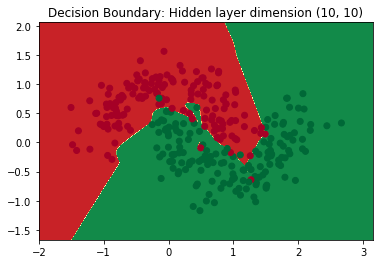

In [11]:
# Build a model with a 3-dimensional hidden layer
model, loss = build_model(X, y_onehot, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim,
                          lr, epoch, print_loss=True, init_type='randn')
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x), X, y)
plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim1, nn_hdim2))

(*5 points*) P1.2 Plot training losses over the number of epochs. 

Text(0, 0.5, 'Training loss')

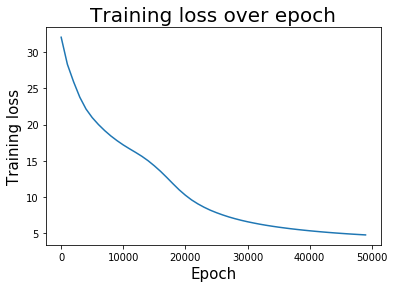

In [12]:
plt.plot(np.arange(len(loss)) * 1000, loss)
plt.title('Training loss over epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Training loss', fontsize=15)

### II. Play with your networks
(*5 points*) P2.1 Change size of hidden layers as follows, and plot decision boundaries. 
(1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are size of first and second hidden layers, respectively. 

In [13]:
from P07 import predict

Learning NN: Hidden layer dimension (1, 1) ... done
Learning NN: Hidden layer dimension (2, 2) ... done
Learning NN: Hidden layer dimension (3, 3) ... done
Learning NN: Hidden layer dimension (4, 4) ... done
Learning NN: Hidden layer dimension (5, 5) ... done
Learning NN: Hidden layer dimension (20, 20) ... done
Learning NN: Hidden layer dimension (50, 50) ... done


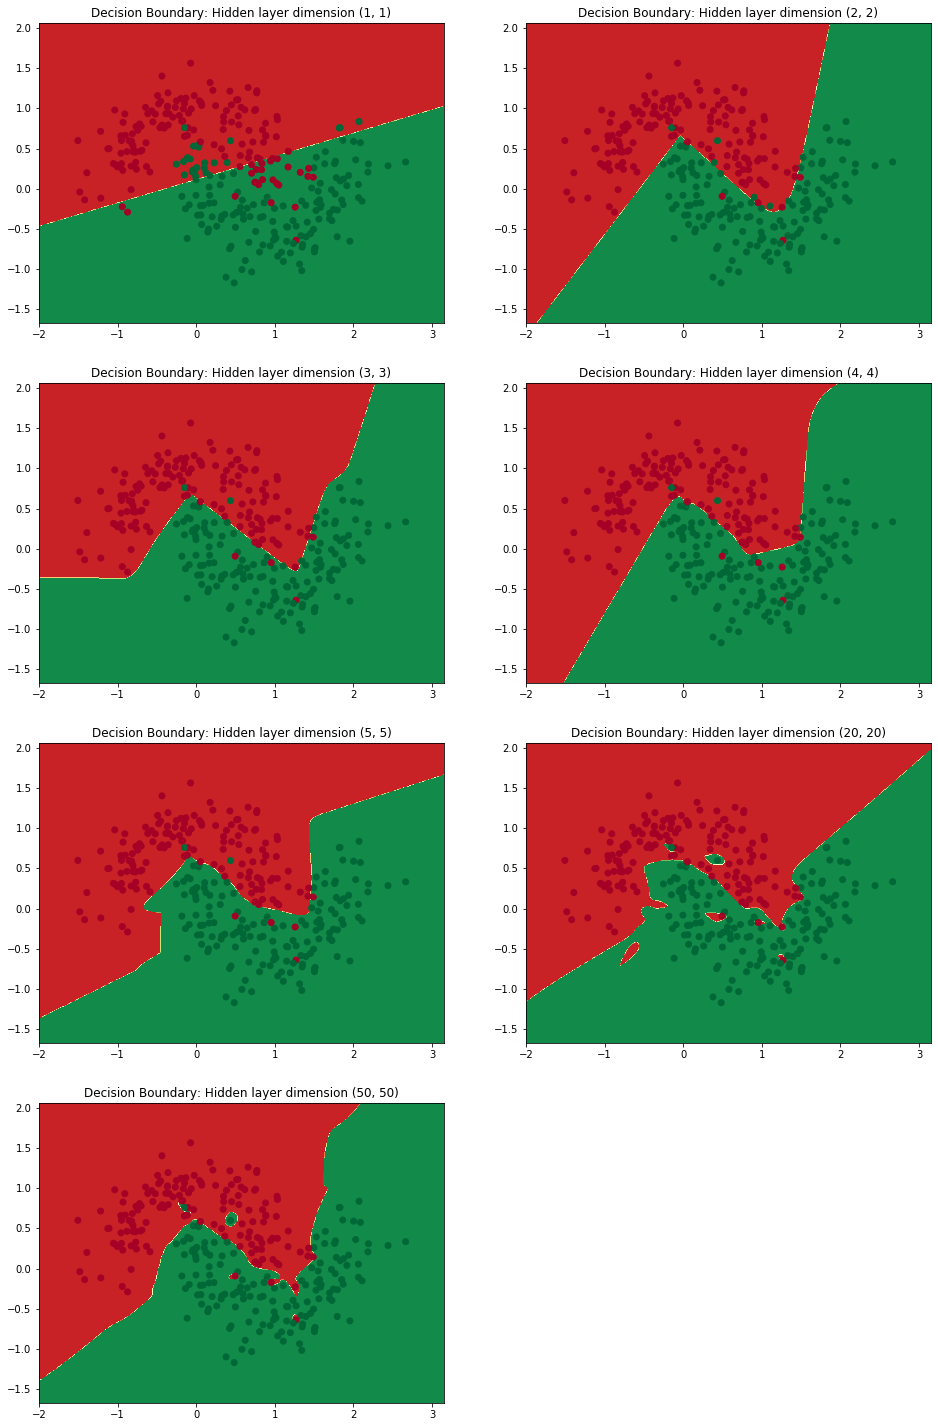

In [14]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim, nn_hdim))
    model, _ = build_model(X, y_onehot, nn_input_dim, nn_hdim, nn_hdim, nn_output_dim,
                           lr, epoch, False, 'randn')
    plot_decision_boundary(lambda x: predict(model, x), X, y)
    print("Learning NN: Hidden layer dimension (%d, %d) ... done" % (nn_hdim, nn_hdim))
plt.show()

# Result Analysis and Discussion (20 points)

For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Random initialization vs Constant initialization
- Relationship between the number of hidden layers and decision boundary.


**What is Neural Network?**

In this assignment, we implemented a supervised feed-forward multi-layered perceptron model, also known as Neural Network. The Neural Network has 2 input neurons in the input layer, 2 Softmax output neurons in the output layer, as well as 10 ReLU and 10 Sigmoid neurons in the 1st and 2nd hidden layer respectively. Each neuron consists of an activation function which introduces non-linearities into the network. This allow us to attain a non-linear decision boundary as seen in P1.1, giving NN an edge over its linear counterpart when modeling non-linear dataset. Forward Propagation is used to predict a given data sample; its input feature is fed into the network from left to right. Back Propagation, on the other hand, is used to train the network. Back Propagation allows us to compute the gradient of Loss function (Cross-Entropy in our case) with respect to each of the weights in the network. The weights are then updated as follows:
$$\\{ W }_{ t+1 }={ W }_{ t }-\eta \frac { \partial L }{ \partial { W }_{ k } } \\ $$
As such, Back Propagation could be thought of as gradient descent, or more specifically, (mini-batch) stochastic gradient descent as commonly used in the industry.

The following link directs to an image where I derive the gradient of the weights in the last layer via Back Propagation. The rest of the weights were omitted for brevity. 

https://drive.google.com/open?id=1t9JbtWRK57yLVTtDWMaNUw2Z7-Sc-EnV


Text(0.5, 1.0, 'Decision Boundary: Hidden layer dimension (10, 10)')

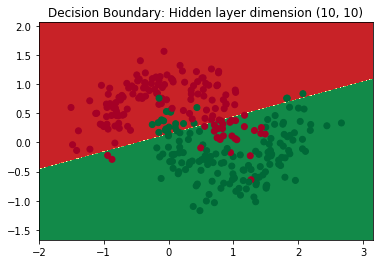

In [15]:
# Build a model using constant initialization
model, loss = build_model(X, y_onehot, nn_input_dim, nn_hdim1, nn_hdim2, nn_output_dim,
                          lr, epoch, print_loss=False, init_type='const')
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x), X, y)
plt.title("Decision Boundary: Hidden layer dimension (%d, %d)" % (nn_hdim1, nn_hdim2))

**Random initialization vs Constant initialization**

The above cell attempts to build a model with constant initialization of the value one on the weights. As can be seen from the decision boundary graph, the network failed to attain a non-linear model, alongside similar weights across different neurons and even within a neuron itself. The model was stuck during training as there was no changes to the network weights after several iteration. To resolve this, neighbouring neurons in the same hidden layer must be initialized with different weights for back propagation to work. This is referred to as the need to break symmetry. One such technique is Random initialization, which allows us to train a non-linear model with distinct weights across neurons. 

**Relationship between the size / number of hidden layers and decision boundary**

In part two, we altered our network's hidden layer size by adding more neurons 7 times (1, 2, 3, 4, 5, 20, 50) and determined the decision boundary. It can be seen that the decision boundary becomes more and more non-linear as the hidden layer size increases. When the size becomes large (as in 20 and 50), the model overfits the training data by curving into a few previously-wrongly classified data samples to correctly classify them. This leads to an increase in generalization error.

Similarly, an increase in the number of hidden layers would lead to a more non-linear decsion boundary. Afterall, the main purpose of these hidden layers is to introduce non-linearity into the network. As with hidden layer size, too many hidden layers would lead to too many weights which in turn causes overfitting. Regularization must be applied under such circumstances to reduce generalization error.